In [1]:

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('sqf-2017.csv')

In [229]:
#df.info()


In [4]:
df.head()

,STOP_FRISK_ID,STOP_FRISK_DATE,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,SPRINT_NUMBER,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,...,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_PREMISES_NAME,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME
0,1,1/16/2017,14:26:00,2017,January,Monday,Based on Self Initiated,11617924,APP,SGT,...,(null),(null),180 GREENWICH STREET,(null),GREENWICH STREET,982381,201750,(null),PBMS,MANHATTAN
1,2,1/16/2017,14:26:00,2017,January,Monday,Based on Self Initiated,11617924,APP,SGT,...,(null),(null),180 GREENWICH STREET,(null),GREENWICH STREET,982381,201750,(null),PBMS,MANHATTAN
2,3,2/8/2017,11:10:00,2017,February,Wednesday,Based on C/W on Scene,17020808555,APP,POM,...,C,(null),WALL STREET && BROADWAY,(null),WALL STREET,981005,197131,(null),PBMS,MANHATTAN
3,4,2/20/2017,11:35:00,2017,February,Monday,Based on Self Initiated,9027,APP,POM,...,H,(null),75 GREENE STREET,(null),GREENE STREET,984031,202796,(null),PBMS,MANHATTAN
4,5,2/21/2017,13:20:00,2017,February,Tuesday,Based on Radio Run,10439,APP,POM,...,H,2,429 WEST BROADWAY,(null),WEST BROADWAY,983894,203523,(null),PBMS,MANHATTAN


1.Explore the data based on the race feature. Determine how many individuals from each reported category were frisked citywide, and then per each borough.

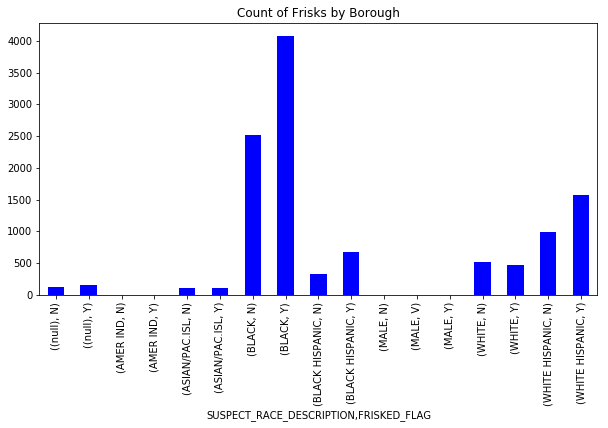

In [20]:
df.groupby(['SUSPECT_RACE_DESCRIPTION','FRISKED_FLAG'])['FRISKED_FLAG'].count().plot(kind = 'bar', color = 'blue', title = 'Count of Frisks by Borough', figsize = (10, 5))

In [17]:

df.groupby(['SUSPECT_RACE_DESCRIPTION','STOP_LOCATION_BORO_NAME','FRISKED_FLAG'])['FRISKED_FLAG'].count()

SUSPECT_RACE_DESCRIPTION  STOP_LOCATION_BORO_NAME  FRISKED_FLAG
(null)                    (null)                   N                 1
                                                   Y                 4
                          BRONX                    N                14
                                                   Y                29
                          BROOKLYN                 N                40
                                                   Y                35
                          MANHATTAN                N                27
                                                   Y                21
                          QUEENS                   N                31
                                                   Y                52
                          STATEN IS                N                 5
                                                   Y                 9
AMER IND                  MANHATTAN                N                 4
             

2: Explore the STOP_DURATION_MINUTES feature. Remove any outliers, and describe the distribution of values including a visualization.

In [21]:
df.groupby('SUSPECT_RACE_DESCRIPTION')['STOP_DURATION_MINUTES'].count()

SUSPECT_RACE_DESCRIPTION
(null)             268
AMER IND             9
ASIAN/PAC.ISL      206
BLACK             6595
BLACK HISPANIC     997
MALE                 7
WHITE              977
WHITE HISPANIC    2570
Name: STOP_DURATION_MINUTES, dtype: int64

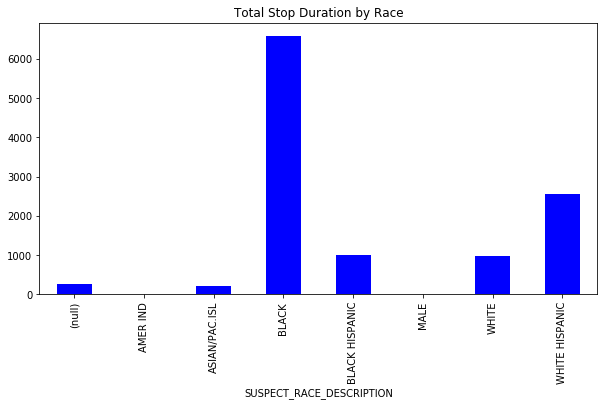

In [70]:
df.groupby('SUSPECT_RACE_DESCRIPTION')['STOP_DURATION_MINUTES'].count().plot(kind = 'bar', color = 'blue', title = 'Total Stop Duration by Race', figsize = (10, 5))

In [23]:
duration=df['STOP_DURATION_MINUTES']

In [25]:
duration.describe()

count    11629.000000
mean        11.938602
std         26.264021
min          0.000000
25%          5.000000
50%          7.000000
75%         12.000000
max        999.000000
Name: STOP_DURATION_MINUTES, dtype: float64

In [42]:
duration.head()

0    90
1    90
2    40
3    40
4    60
Name: STOP_DURATION_MINUTES, dtype: int64

In [27]:
#outliers: < Q1 – 1.5 IQR or > Q3 + 1.5
#IQR=12-5=7  1.5IQR=10.5
#outliers>22.5


In [63]:
#remove outliers
cd=df[df['STOP_DURATION_MINUTES']<=22.5]

In [ ]:
cd

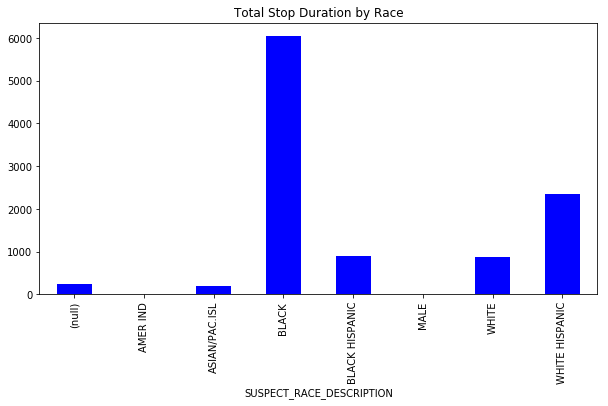

In [76]:
cd.groupby('SUSPECT_RACE_DESCRIPTION')['STOP_DURATION_MINUTES'].count().plot(kind = 'bar', color = 'blue', title = 'Total Stop Duration by Race', figsize = (10, 5))


3.Explore some variables by the Gender feature. How many frisks were of non-male suspects versus male?



In [106]:
df.groupby('SUSPECT_SEX')['FRISKED_FLAG'].count()

SUSPECT_SEX
(null)       84
19            1
23            1
24            1
39            1
FEMALE      973
MALE      10568
Name: FRISKED_FLAG, dtype: int64

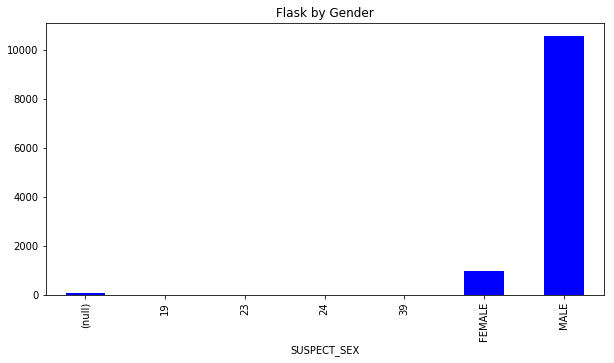

In [107]:
df.groupby('SUSPECT_SEX')['FRISKED_FLAG'].count().plot(kind = 'bar', color = 'blue', title = 'Flask by Gender', figsize = (10, 5))


In [105]:
cd.groupby('SUSPECT_SEX')['STOP_DURATION_MINUTES'].count()


SUSPECT_SEX
(null)      78
19           1
23           1
24           1
39           1
FEMALE     869
MALE      9665
Name: STOP_DURATION_MINUTES, dtype: int64

4.What percentage of stops were black males ages 18 - 35?



In [137]:
#convert age column to number
for index, row in df.iterrows():
    if row['SUSPECT_REPORTED_AGE'] == "(null)":
        df.loc[index, 'SUSPECT_REPORTED_AGE'] = "0"
df['SUSPECT_REPORTED_AGE'] = df['SUSPECT_REPORTED_AGE'].astype("int64")
type(df['SUSPECT_REPORTED_AGE'][0])

numpy.int64

In [150]:
bm = df[df['SUSPECT_RACE_DESCRIPTION']=='BLACK'].reset_index(drop=True)
bm = bm[bm['SUSPECT_REPORTED_AGE'] >= 18].reset_index(drop=True)
bm = bm[bm['SUSPECT_REPORTED_AGE'] <= 35].reset_index(drop=True)
print("percentage of stops were black males age 18-35: ")
print(round(len(bm)/len(df)*100,2),"%")

percentage of stops were black males age 18-35: 
30.91 %


5.Describe the overall use of physical force in the stops. These are the columns:


In [163]:
df['PHYSICAL_FORCE_CEW_FLAG'].describe()

count      11629
unique         2
top       (null)
freq       11613
Name: PHYSICAL_FORCE_CEW_FLAG, dtype: object

In [171]:
#male=df[df['SUSPECT_SEX']=='male']
cew=df[df['PHYSICAL_FORCE_CEW_FLAG']=='Y']

In [172]:
len(cew)

16

In [164]:
df['PHYSICAL_FORCE_DRAW_POINT_FIREARM_FLAG'].describe()

count      11629
unique         2
top       (null)
freq       11166
Name: PHYSICAL_FORCE_DRAW_POINT_FIREARM_FLAG, dtype: object

In [173]:
FIREARM=df[df['PHYSICAL_FORCE_DRAW_POINT_FIREARM_FLAG']=='Y']

In [174]:
len(FIREARM)

463

In [170]:
df['PHYSICAL_FORCE_HANDCUFF_SUSPECT_FLAG'].describe()

count      11629
unique         2
top       (null)
freq        9708
Name: PHYSICAL_FORCE_HANDCUFF_SUSPECT_FLAG, dtype: object

In [175]:
HANDCUFF=df[df['PHYSICAL_FORCE_HANDCUFF_SUSPECT_FLAG']=='Y']
len(HANDCUFF)

1921

In [178]:
Spray=df[df['PHYSICAL_FORCE_OC_SPRAY_USED_FLAG']=='Y']

len(Spray)

3

In [179]:
Other=df[df['PHYSICAL_FORCE_OTHER_FLAG']=='Y']

len(Other)

289

In [180]:
RESTRAINT=df[df['PHYSICAL_FORCE_RESTRAINT_USED_FLAG']=='Y']
len(RESTRAINT)

373

In [181]:
Verbal=df[df['PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG']=='Y']
len(Verbal)

10422

In [182]:

Weapon=df[df['PHYSICAL_FORCE_WEAPON_IMPACT_FLAG']=='Y']
len(Weapon)


6

Verbal instruction is used most frequently(10422), and Spray is used least frequently(3)

In [199]:
label=['Cew','Firearm','Handcuff','Spray','Other','Restraint','Verbal','Weapon']
frequency=[16,463,1921,3,289,373,10422,6]

Text(0.5,1,'Overall use of physical force')

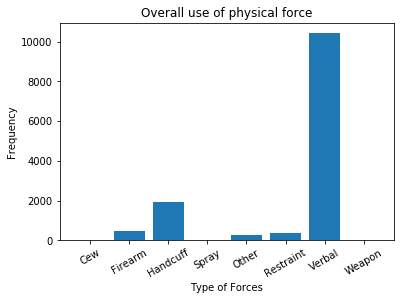

In [203]:
index = np.arange(len(label))
plt.bar(index, frequency)
plt.xlabel('Type of Forces', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.xticks(index, label, fontsize=10, rotation=30)
plt.title('Overall use of physical force')
    

6.What can you say about the SUSPECT_ARREST_OFFENSE column? Were most people stopped arrested? Were the rates across races similar?

In [228]:
#df['SUSPECT_ARREST_OFFENSE']

In [206]:
df['SUSPECT_ARREST_OFFENSE'].describe()


count      11629
unique        30
top       (null)
freq        8166
Name: SUSPECT_ARREST_OFFENSE, dtype: object

In [211]:
#Other=df[df['PHYSICAL_FORCE_OTHER_FLAG']=='Y']

not_arrested=df[df['SUSPECT_ARREST_OFFENSE']=='(null)']


In [214]:

len(not_arrested)/len(df)

0.7022099922607274

70.22% stopped are not arrested

In [215]:
arrested=df[df['SUSPECT_ARREST_OFFENSE']!='(null)']

In [217]:
#arrested.head()

In [225]:
arrested.groupby('SUSPECT_RACE_DESCRIPTION')['FRISKED_FLAG'].count()

SUSPECT_RACE_DESCRIPTION
(null)              47
ASIAN/PAC.ISL       53
BLACK             1861
BLACK HISPANIC     310
MALE                 2
WHITE              337
WHITE HISPANIC     853
Name: FRISKED_FLAG, dtype: int64

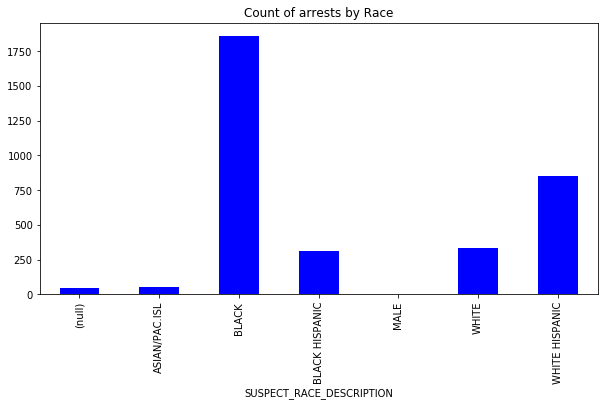

In [227]:
arrested.groupby('SUSPECT_RACE_DESCRIPTION')['FRISKED_FLAG'].count().plot(kind = 'bar', color = 'blue', title = 'Count of arrests by Race', figsize = (10, 5))

7.Identify a publication that used this data to investigate a specific area of interest, or a full summary like the RAND report. Here is a list of information about relevant studies:

A:This data was used to in an economic analysis of black-white disparities in the New York Police Department's Stop-and-Frisk program. This paper is published in 2015 by "The Journal of Legal Studies".
 They want to identify two distinct sources of bias in the New York Police Department’s stop-and-frisk program:"the police officer making the stop decisions and the police chief allocating personnel across precincts."